> 연습문제 5.3, 5.4 실습

## 연습문제 5.3

아래와 같이 자료를 입력한다.

In [1]:
zt<-c(144.652,195.596,236.569,269.265,296.791,316.682,332.593,344.834,356.644,
      363.775,370.994,377.784,382.254,386.211,388.574,391.118,394.627,395.785,
      395.693,396.811,397.249,397.433,398.767,398.971,399.108,400.958,398.660,
      399.348,398.293,397.886)

### (a) 
시계열 그림을 그려라.

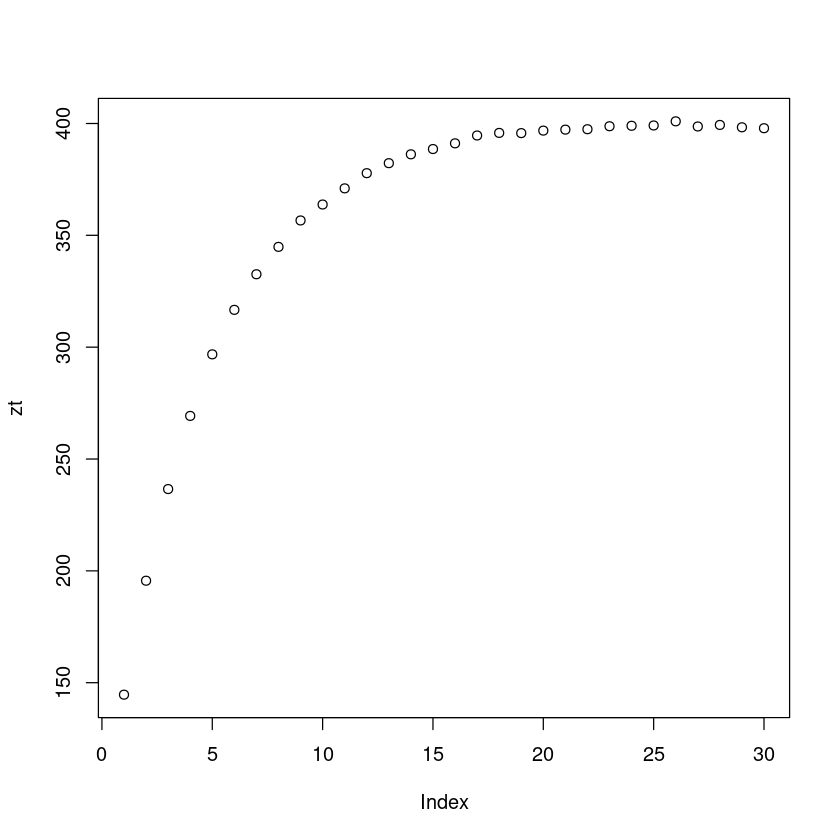

In [2]:
plot(zt)

### (b)

(a)의 시계열로부터 $\rho_1$은 양수, $0$, 혹은 음수 중 어느 값이라 기대되는가?

-   $\rho_1>0$ 일 것으로 기대함.

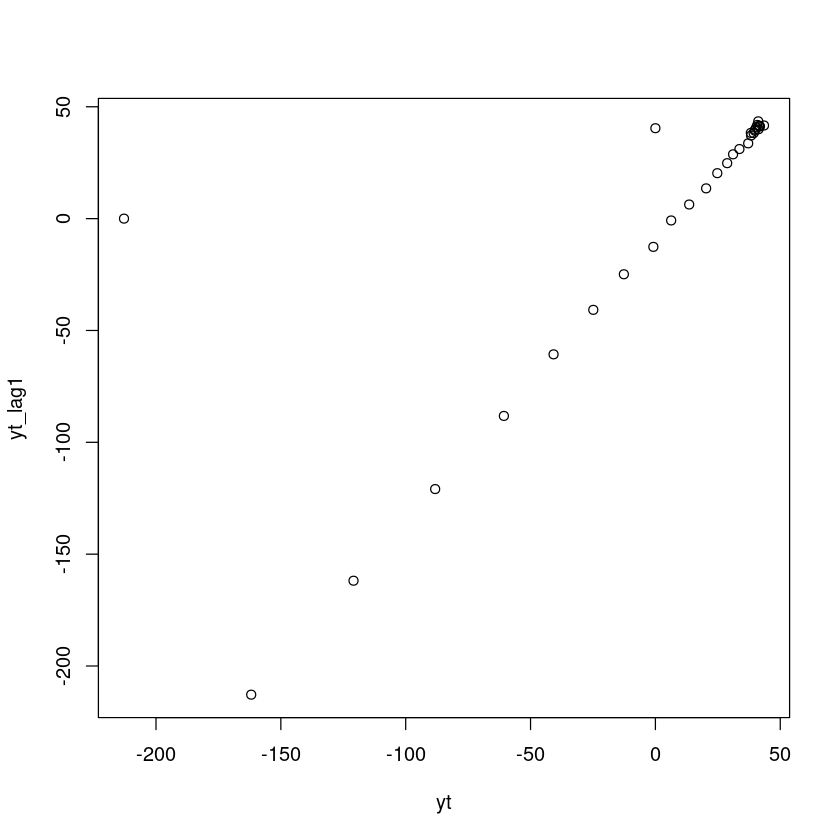

In [3]:
yt<-c(zt-mean(zt),0) # 표준화
yt_lag1<-c(0,zt-mean(zt))
plot(yt,yt_lag1)

### (c)

$Z_t$에 대하여 $Z_{t-1}$의 산점도를 그려보고, 다시 $\rho_1$은 어느 정도의 값이 되리라 기대되는가?

yt_lag1 
0.7867225

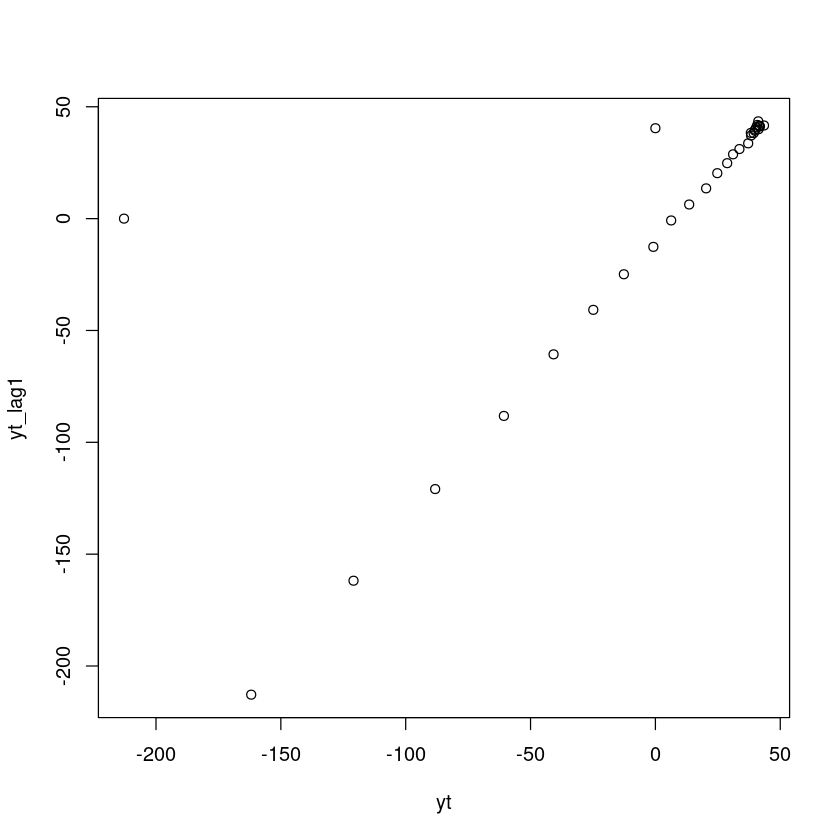

In [20]:
yt<-c(zt-mean(zt),0)
yt_lag1<-c(0,zt-mean(zt))
plot(yt,yt_lag1)
lm(yt~yt_lag1)$coefficients[2]

-   acf의 계수값은 regression을 한 coefficient의 계수값이라고 생각해도 된다.

### (d)

SACF $\hat{\rho}_k,k=0,1,\dots,10$ 를 구하여 표본상관도표를 그려라.

, , 1

             [,1]
 [1,]  1.00000000
 [2,]  0.78672246
 [3,]  0.61310906
 [4,]  0.47134840
 [5,]  0.35543318
 [6,]  0.26233059
 [7,]  0.18488731
 [8,]  0.11931704
 [9,]  0.06197039
[10,]  0.01524803
[11,] -0.02785225
[12,] -0.06548592
[13,] -0.09652258
[14,] -0.12428019
[15,] -0.14821524

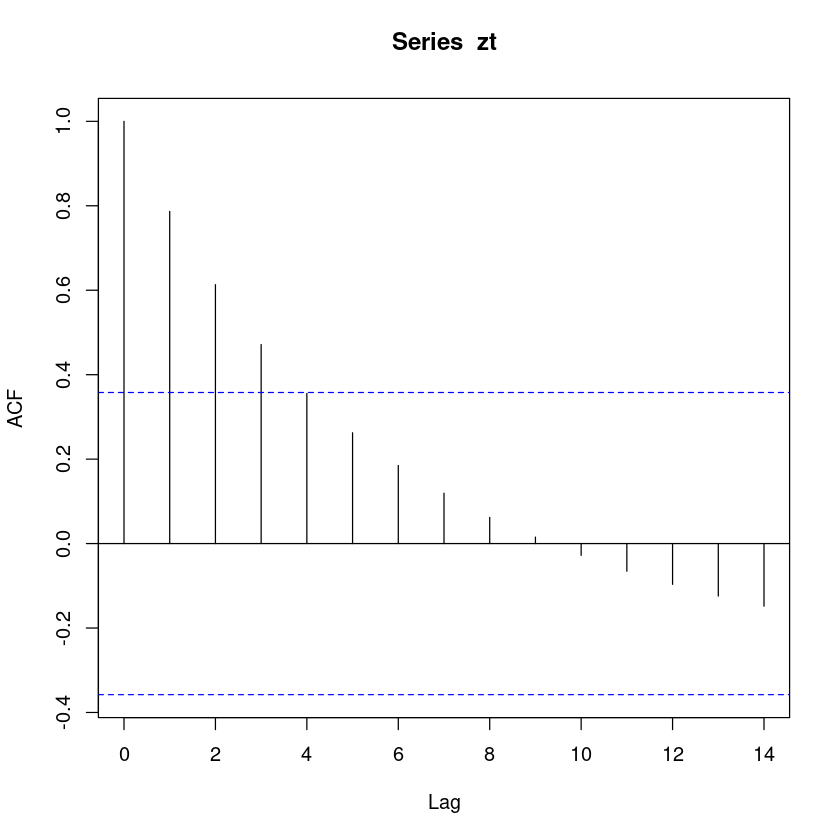

In [21]:
acf_result<-acf(zt)
acfvalues<-acf_result$acf
acfvalues
plot(acf_result)

### (e)

$Z_t$에 대하여 $Z_{t-2}$의 산점도를 그려보고, 이 그림이 (d)에서 계산된 $\hat{\rho}_2$에 상응하는지를 논하라.

yt_lag2 
0.6131091

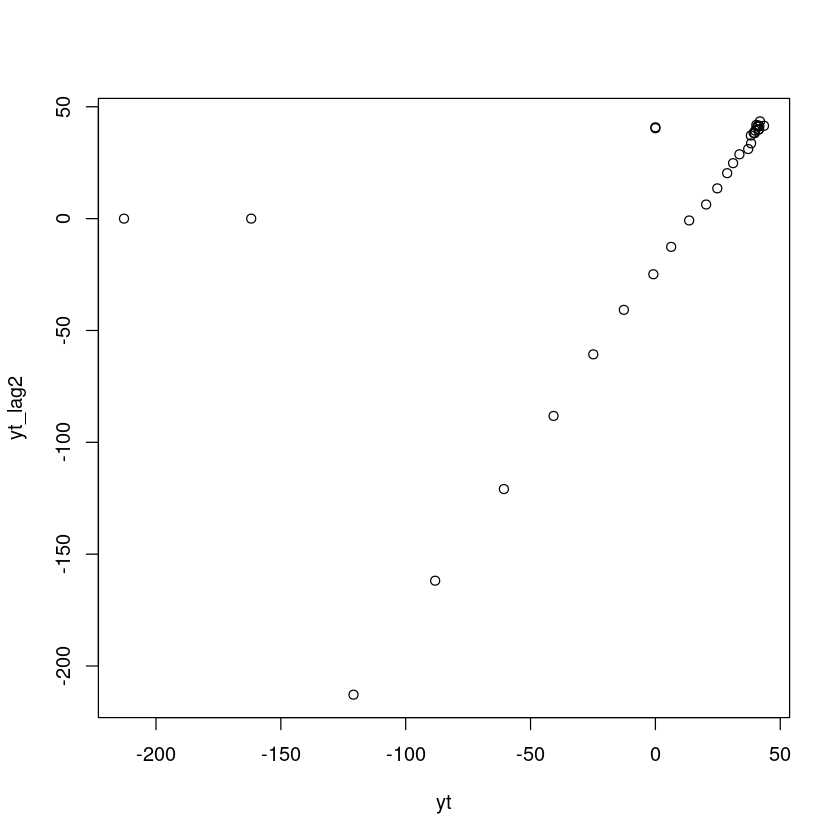

In [22]:
yt<-c(zt-mean(zt),0,0)
yt_lag1<-c(0,zt-mean(zt),0)
yt_lag2<-c(0,0,zt-mean(zt))
plot(yt,yt_lag2)
lm(yt~yt_lag2)$coefficients[2]

**sacf를 구하는 방법 1**

In [23]:
gamma_0 <- sum(yt*yt)
gamma_1 <- sum(yt*yt_lag1)
rho1 <- gamma_1/gamma_0
gamma_2 <- sum(yt*yt_lag2)
rho2 <- gamma_2/gamma_0
cat(rho1, rho2)

0.7867225 0.6131091

**sacf를 구하는 방법 2**

, , 1

             [,1]
 [1,]  1.00000000
 [2,]  0.78672246
 [3,]  0.61310906
 [4,]  0.47134840
 [5,]  0.35543318
 [6,]  0.26233059
 [7,]  0.18488731
 [8,]  0.11931704
 [9,]  0.06197039
[10,]  0.01524803
[11,] -0.02785225
[12,] -0.06548592
[13,] -0.09652258
[14,] -0.12428019
[15,] -0.14821524

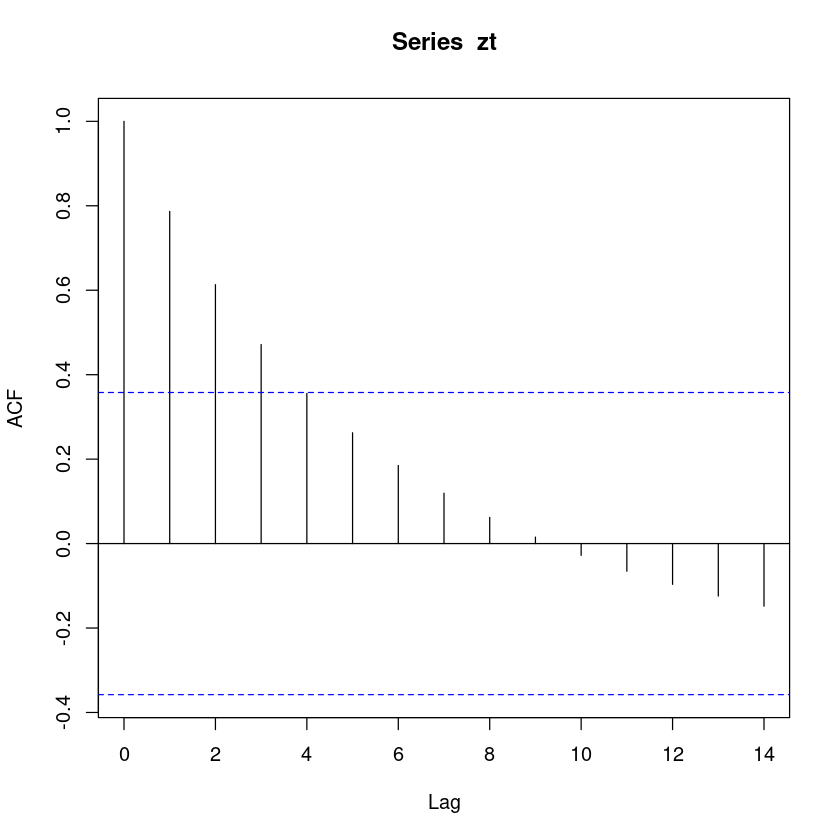

In [24]:
acf(zt)$acf

**sacf를 구하는 방법 3**

In [25]:
# (1) rho1을 구하는 법: yt ~ yt_lag1
lm(yt~yt_lag1)$coef[2]

# (2) rho2을 구하는 법: yt ~ yt_lag2
lm(yt~yt_lag2)$coef[2]

yt_lag1 
0.7867225

yt_lag2 
0.6131091

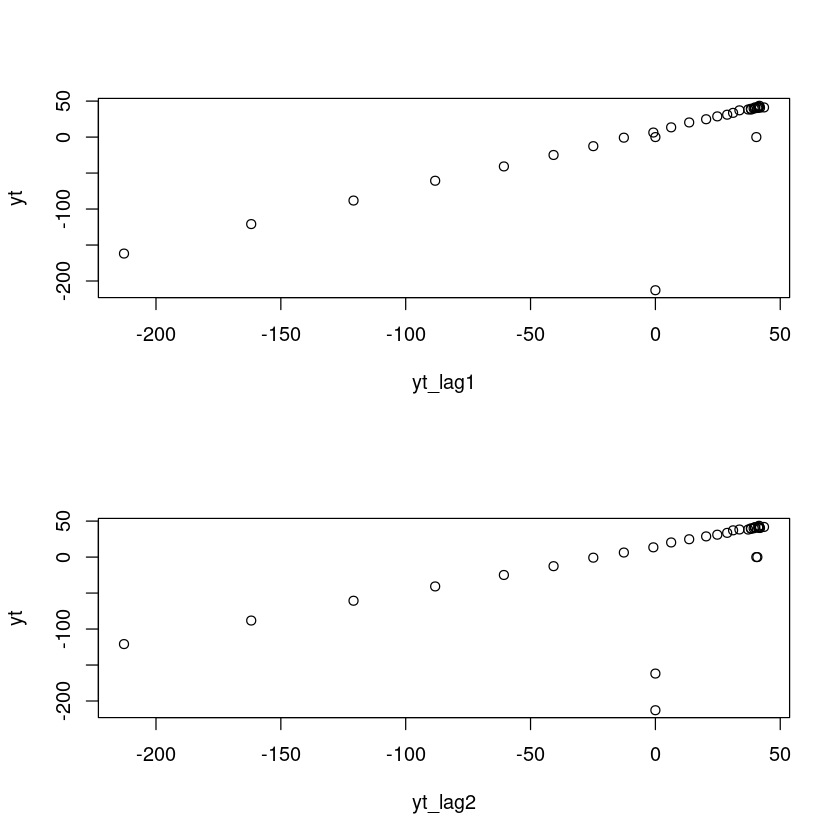

In [27]:
par(mfrow=c(2,1))
plot(yt_lag1, yt)
plot(yt_lag2, yt)

-   위에 있는 그래프의 기울기가 아래에 있는 그래프의 기울기보다 조금 더 가파르게 나타난다. (아주 미세한 차이지만..)
-   즉, yt와 lag1의 correlation이 yt와 lag2의 correlation 보다 강하다고 추측을 할 수 있다.

### (f) SPACF를 구하라.

SPACF $\hat{\phi}_{kk},k=1,2,\dots,10$을 구하여 표본상관도표를 그려라.

, , 1

              [,1]
 [1,]  0.915142832
 [2,]  0.097099164
 [3,]  0.027803130
 [4,]  0.002343684
 [5,] -0.060069904
 [6,] -0.111745287
 [7,]  0.080637070
 [8,]  0.010304596
 [9,]  0.132408979
[10,]  0.031574334
[11,] -0.088386730
[12,] -0.058457746
[13,] -0.044925052
[14,]  0.045494186
[15,]  0.033808509
[16,] -0.006926641
[17,]  0.001553929
[18,]  0.031117106
[19,] -0.171366229
[20,] -0.022407217

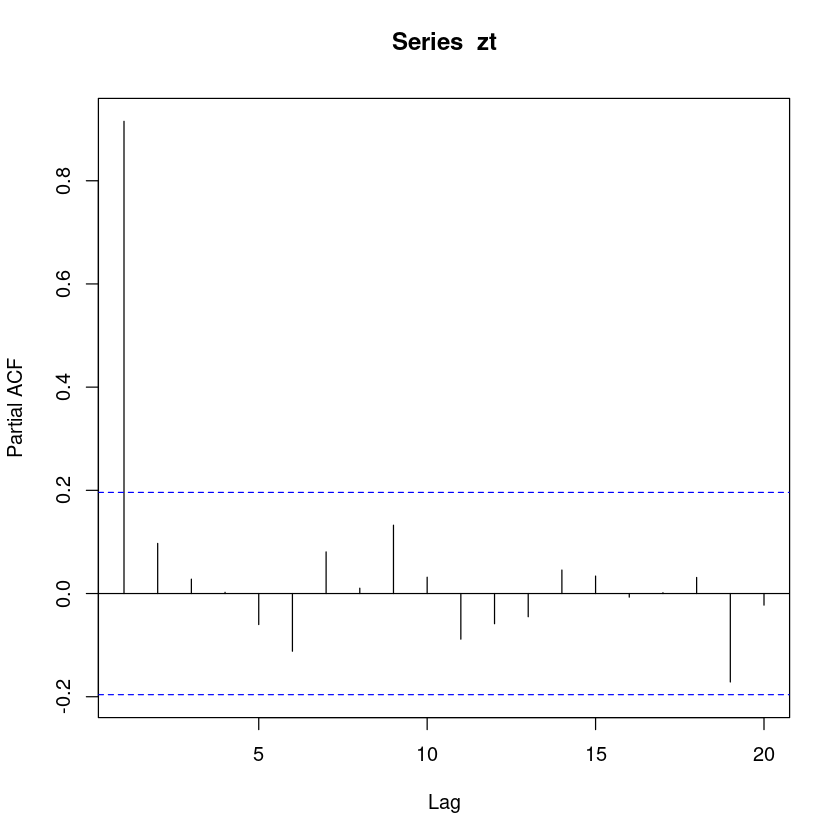

In [47]:
pacf_result<-pacf(zt)
pacfvalues<-pacf_result$acf
pacfvalues
plot(pacf_result)

-   파란 점선보다 작으면 $0$으로 봐도 무방하다.
-   PACF는 Lag=1일 때를 제외하고 나머지는 절삭된다. $\to$ Lag1은 의미있다. $\to$ AR(1) 모델로 추정.

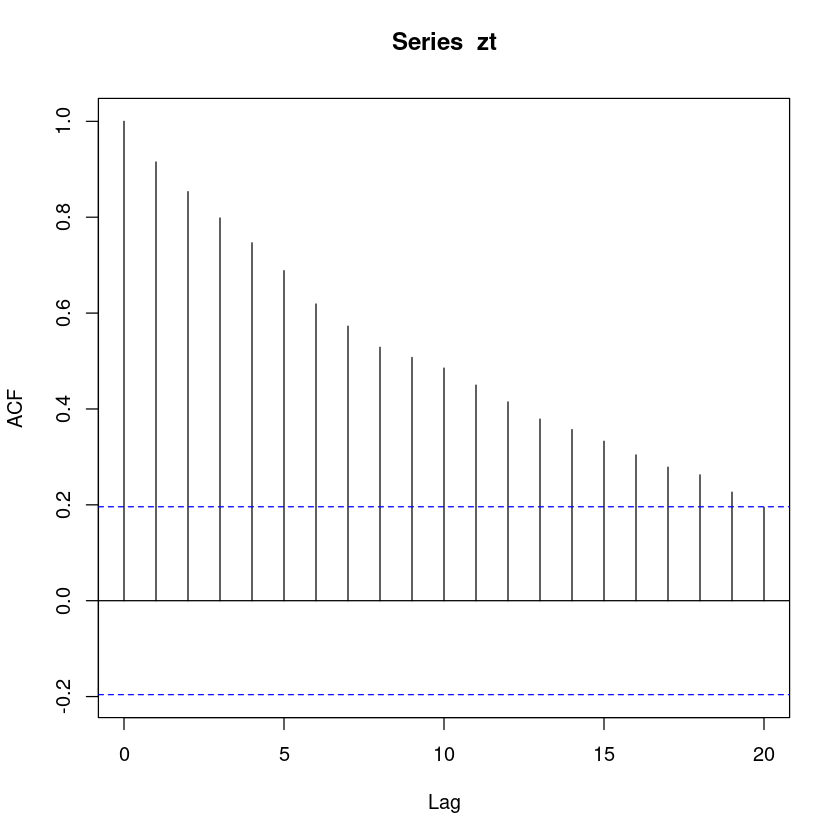

In [49]:
acf(zt) # exponentially 하게 감소

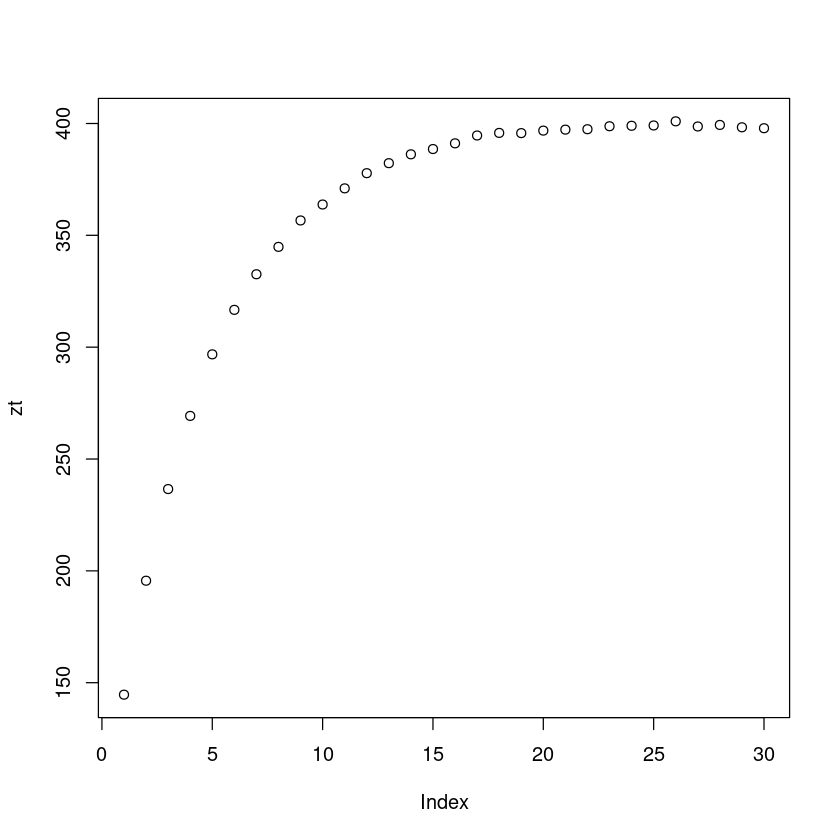

In [31]:
plot(zt) # 이것만 보면 non-stationary 같음.

그림만 보면 non-stationary한 것 같지만 20번째 이후로는 일정한 값만 갖는다.

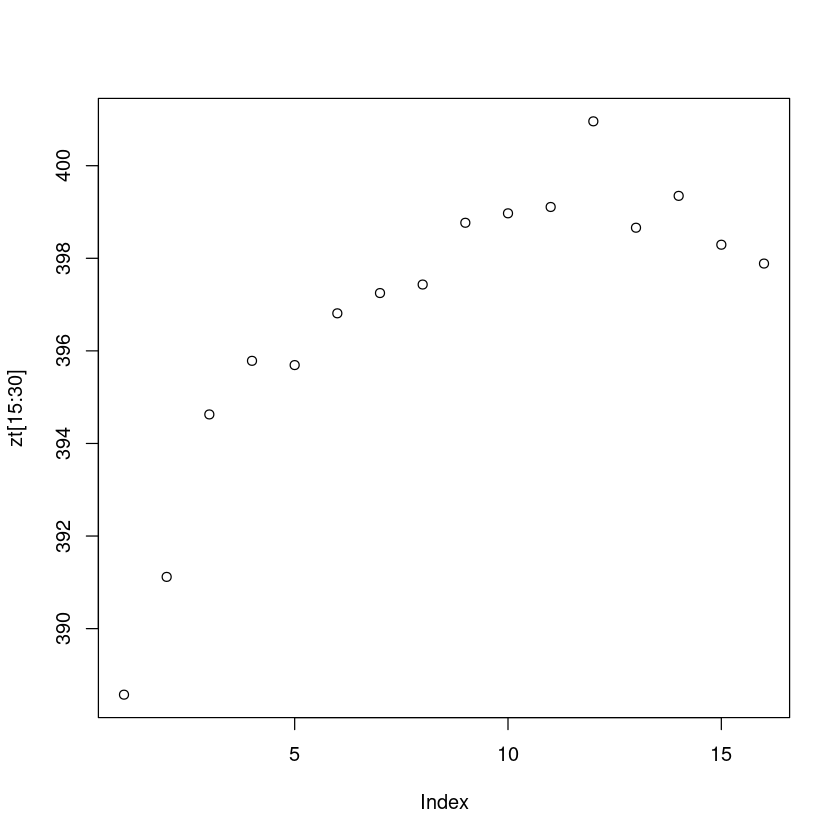

In [32]:
plot(zt[15:30]) # 무한대로 가면 stationary 하겠다!

결국 시계열에서 $-\infty \sim \infty$ 시점에서 stationary 한지 따져보는 방법과, 0시점에서 시작해서 $\infty$ 까지 갈 때 stationary 한지 따져보는 방법이 있는데 지금은 0시점에 시작해서 무한대까지 가는 시계열이라고 해석을 할 수 있고, 무한대로 갔을 때 stationary하게 400 근처에 있을 것. 

`(번외)`  stationary한지 테스트하는 방법이 있다. adf test 했을 때  non-stationary라고 나오지만 여러 이론적 근거를 봤을 때 무한대로 갔을 때 무한대 부분만 따로 잘라서 보면 stationary하겠구나 라는 것을 추측해볼 수 있다.

### (g) : $\hat{\phi}_{22}$의 의미:

1.  교재의 설명: $\hat{\phi}_{22}$는 $Z_t$와 $Z_{t+2}$로부터 $Z_{t+1}$의 효과를 제거한후 2시차만큼 떨어진 $Z_t$와 $Z_{t+2}$의 순수한 상관계수. (p.199)

2.  좀더 엄밀한 정의
- (1) partial correlation (conditional correlation)^[그 자체로 설명 (교회와 범죄 얘기~]
- (2) coefficients in the multiple regression model^[1의 정의가 multiple regression model에서의 계수와 똑같아짐을 얘기했다. $Z_t \sim Z_{t-1} + Z_{t-2}$ 이렇게 regression 을 했을 때 $Z_{t-2}$에 해당하는 coefficients]
- (3) (orthogonalization) partial regression coefficients -- back fitting이라고도 함.^[residual을 구한다는 말은 평면에 projection 시키고 남은 값을 구하는 건데 $Z_t$를 평면에 프로젝션 시키면 프로젝션 된 값 SSH에 해당하는 값과 그것의 residual에 해당하는 값 SSE라는 값들은 서로 직교합니다. 즉, 서로 상관이 없어요. 그래서 residual을 구하는 것을 $Z_{t-1}$로 설명하지 않는 나머지의 성분 즉, 직교성분들로 구한느 것과 동일해서 orthogonalization이라는 표현을 쓰기도 합니다.]


이전 시간에 다중회귀를 통해서 회귀계수를 구하는 것과 back-fitting을 통해서 회귀계수를 구하는 것과 결과가 동일함을 증명했었다.

#### (방법1): 가장 쉬운 방법

lag=2에선 SPACF, 즉 $\hat{\phi}_{22}$는 아래와 같이 구할수 있다.

[1] 0.09709916

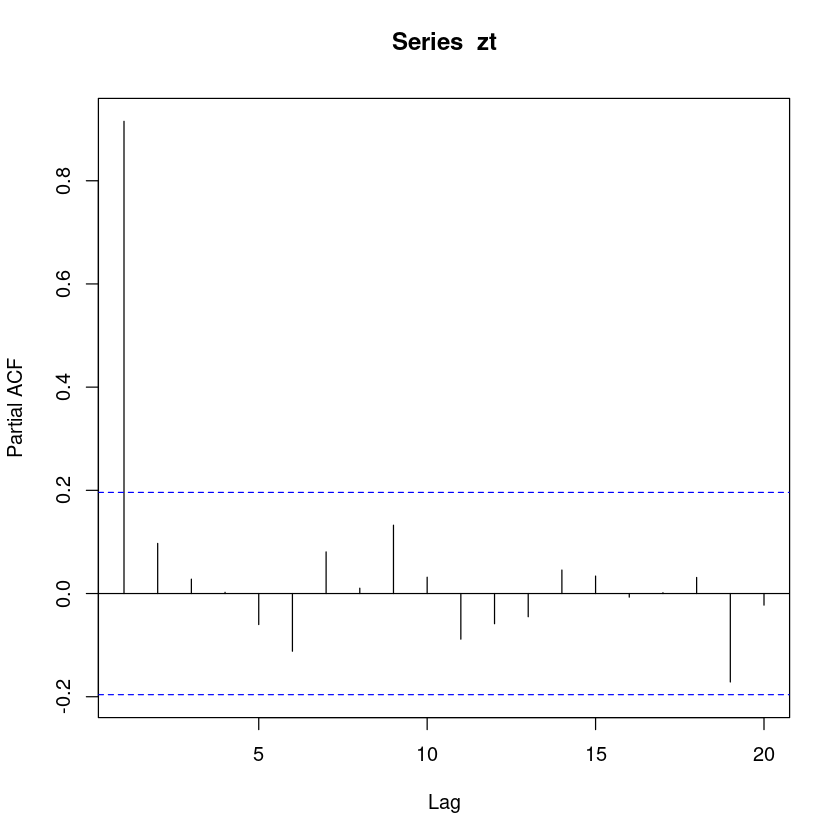

In [55]:
pacf(zt)$acf[2]

#### (방법2) multiple linear regression

In [57]:
lm1<-lm(yt~yt_lag1+yt_lag2) # multiple linear regression
lm1$coefficients[3]

yt_lag2 
0.09709916

In [56]:
names(lm1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [58]:
lm1$coefficients

(Intercept)     yt_lag1     yt_lag2 
 0.77521481  0.82628323  0.09709916

***`(참고)`*** : 
- `lm1$coefficients[2]` : $\phi_{21}$.^[rho도 아니고, partial autocorrelation도 아님. 그냥 방정식 상의 phi{21}이 되는 것입니다.]
- `lm(yt~yt_lag1)$coef[2]` : $\phi_{11}$ 첫번재 pacf

In [64]:
lm1$coefficients[2] # phi_{21}

yt_lag1 
0.8262832

In [62]:
lm(yt~yt_lag1)$coef[2] # \phi_{11} : 첫번째 pacf

yt_lag1 
0.9151428

#### (방법3) Back-fitting

-   step1: residual을 구한다.
-   step2: residual끼리 regression
-   step3: 적합한 모델의 coef


In [68]:
## step1
res1 <- lm(yt~yt_lag1)$res
res2 <- lm(yt_lag2~yt_lag1)$res
lm(res1~res2)$coef[2] # pacf(zt)$acf[2]

res2 
0.09709916

[1] 0.09709916

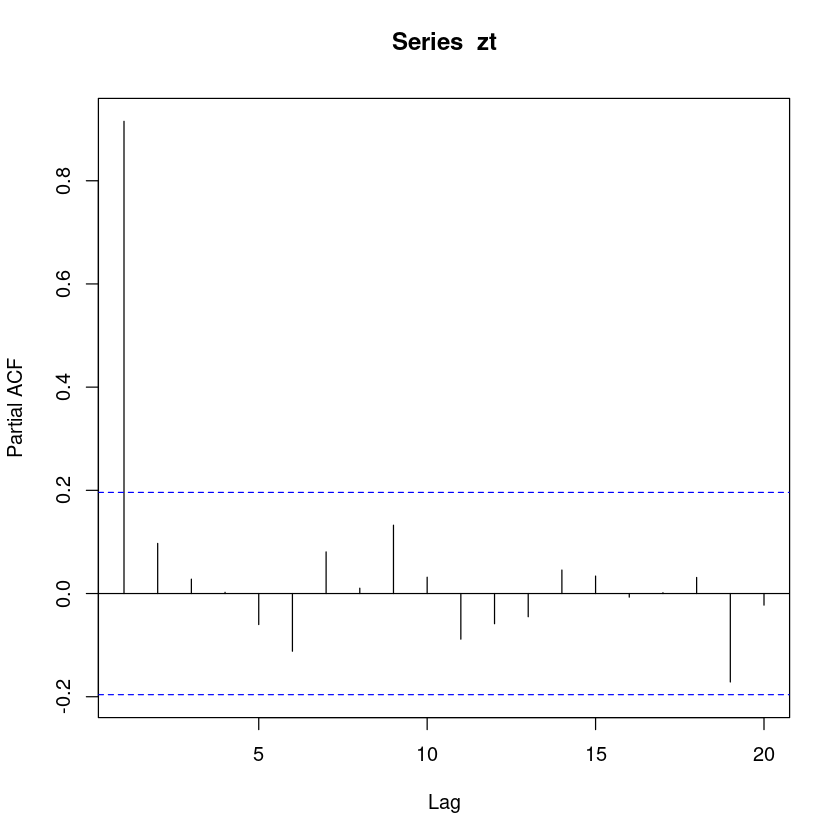

In [70]:
pacf(zt)$acf[2]

In [65]:
## residual
lm01<-lm(yt~yt_lag1) 
lm21<-lm(yt_lag2~yt_lag1)
res1<-lm01$residuals
res2<-lm21$residuals
lm(res1~res2)$coefficients[2] # pacf(zt)$acf[2]

res2 
0.09709916

::: callout-note
-   `lm1$coefficient[3]` : $\phi_{21}$
-   `lm(yt~yt_lag1)$coef[2]` : $\phi_{11}$
:::

------

## 연습문제 5.5


확률과정 $Z_t=1+0.9Z_{t-1}+\epsilon_t$, $t=1,2,\dots,100$으로부터 시계열 자료를 생성한 후 다음을 수행하라. 단, $Z_0=10$의 값을 주고 $\{\epsilon_t\}$는 $\text{WN}$ $N(0,1)$이다.

model: $Z_t=1+0.9Z_{t-1}+\epsilon_t$, $t=1,2,\dots,100$.

In [71]:
set.seed(1306) # 평행세계의 인덱스 (1306번째 평행세계)
zt<-c() # 차원이 미지수인 벡터 
zt[1]<-1+0.9*10+rnorm(1)
# zt[2]<-1+0.9*[1]+rnorm(1)
# zt[3]<-1+0.9*z[2]+rnorm(1)
for(i in 2:100) zt[i]<-1+0.9*zt[i-1]+rnorm(1)
zt

[1] 10.777675 10.660962 11.129924 10.729653  9.382788  9.291090 10.412269
  [8]  9.280671  9.278990  9.050157  9.777134  9.382744  8.805521  8.574072
 [15]  9.663666 10.008613 10.057641  9.088979  9.827647 10.221844 12.170445
 [22] 12.868114 13.236760 12.939106 14.064829 14.689415 11.874574 10.117136
 [29] 10.736236 11.427874 10.870493 11.926313 13.313631 12.119023 13.091750
 [36] 11.537623 13.564257 12.867269 12.301226 12.746935 13.450774 14.667385
 [43] 13.411673 15.307674 14.310807 13.122243 13.087510 11.151739 12.500317
 [50] 12.134043 12.216240 13.294609 13.236690 13.206157 13.783242 12.746678
 [57] 12.107156 11.286982 10.709525 10.366019  8.197414  9.075633  8.349393
 [64]  9.305533  7.439775  8.190043  8.546629  8.696135 10.773879 10.591572
 [71] 10.394556 10.902747  9.770263 10.122317 10.469193  9.587717  9.321004
 [78]  8.713534  6.863494  8.102941  7.681025  7.309215  4.915844  5.597363
 [85]  6.577784  7.037914  7.518736  6.669018  4.465009  5.514308  7.445960
 [92]  6.222425  4.740820  5.294629  5.991279  5.196732  6.505054  6.643898
 [99]  7.958164  9.135744

### (a)

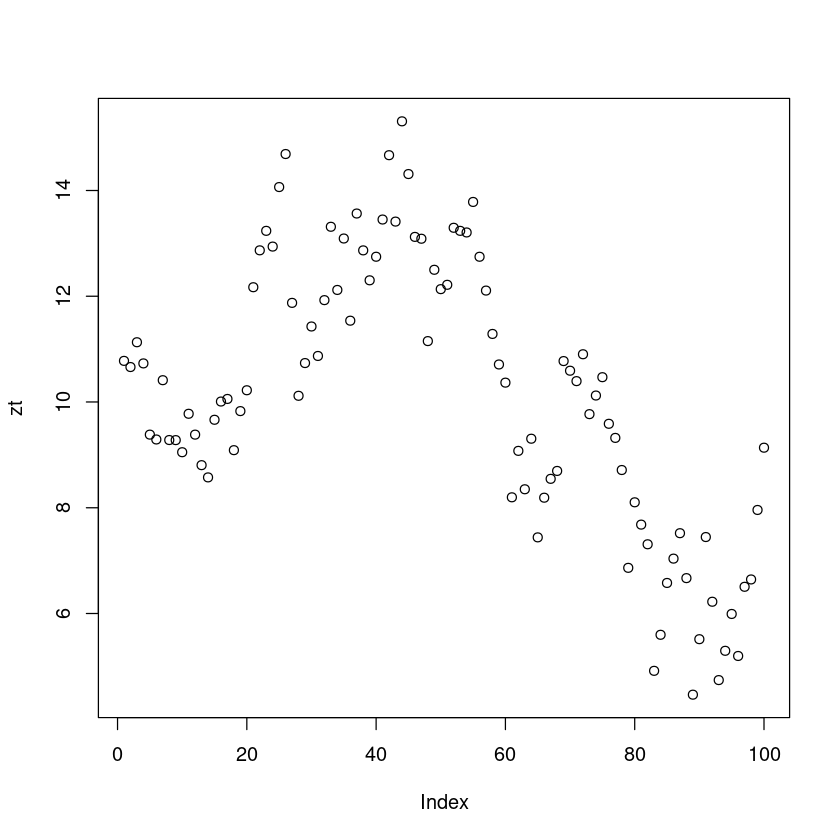

In [72]:
plot(zt)

### (b)

, , 1

           [,1]
 [1,] 1.0000000
 [2,] 0.9151428
 [3,] 0.8532663
 [4,] 0.7983751
 [5,] 0.7465985
 [6,] 0.6884379
 [7,] 0.6189412
 [8,] 0.5726526
 [9,] 0.5286664
[10,] 0.5073208
[11,] 0.4852742
[12,] 0.4497323
[13,] 0.4147162
[14,] 0.3788675
[15,] 0.3569531
[16,] 0.3327448
[17,] 0.3041227
[18,] 0.2785423
[19,] 0.2625320
[20,] 0.2264291
[21,] 0.1947804

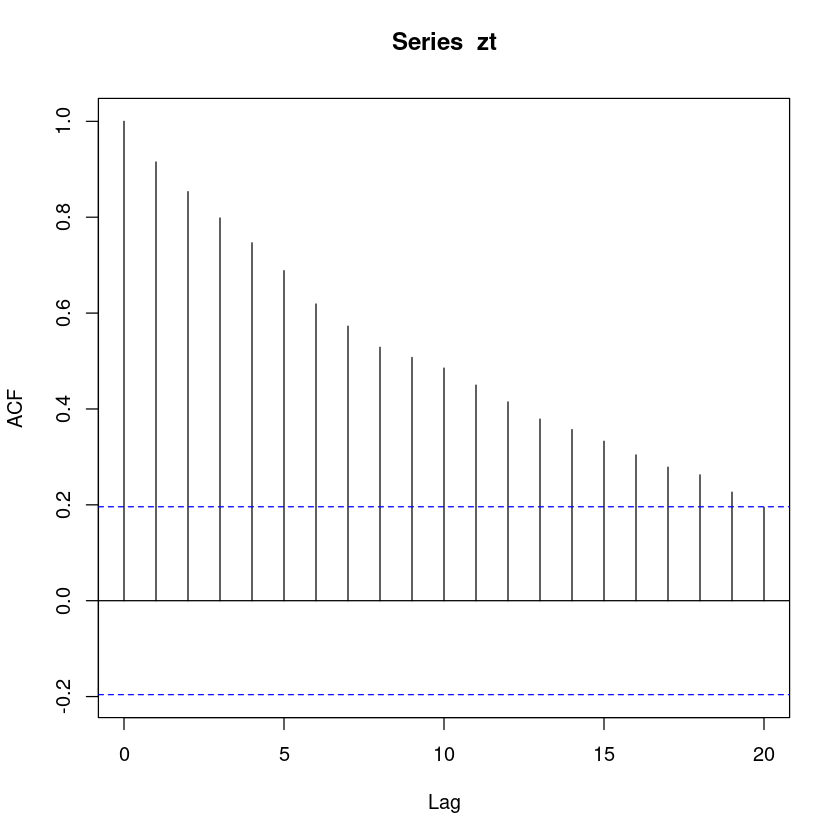

In [73]:
acf(zt)$acf

### (c)

, , 1

              [,1]
 [1,]  0.915142832
 [2,]  0.097099164
 [3,]  0.027803130
 [4,]  0.002343684
 [5,] -0.060069904
 [6,] -0.111745287
 [7,]  0.080637070
 [8,]  0.010304596
 [9,]  0.132408979
[10,]  0.031574334
[11,] -0.088386730
[12,] -0.058457746
[13,] -0.044925052
[14,]  0.045494186
[15,]  0.033808509
[16,] -0.006926641
[17,]  0.001553929
[18,]  0.031117106
[19,] -0.171366229
[20,] -0.022407217

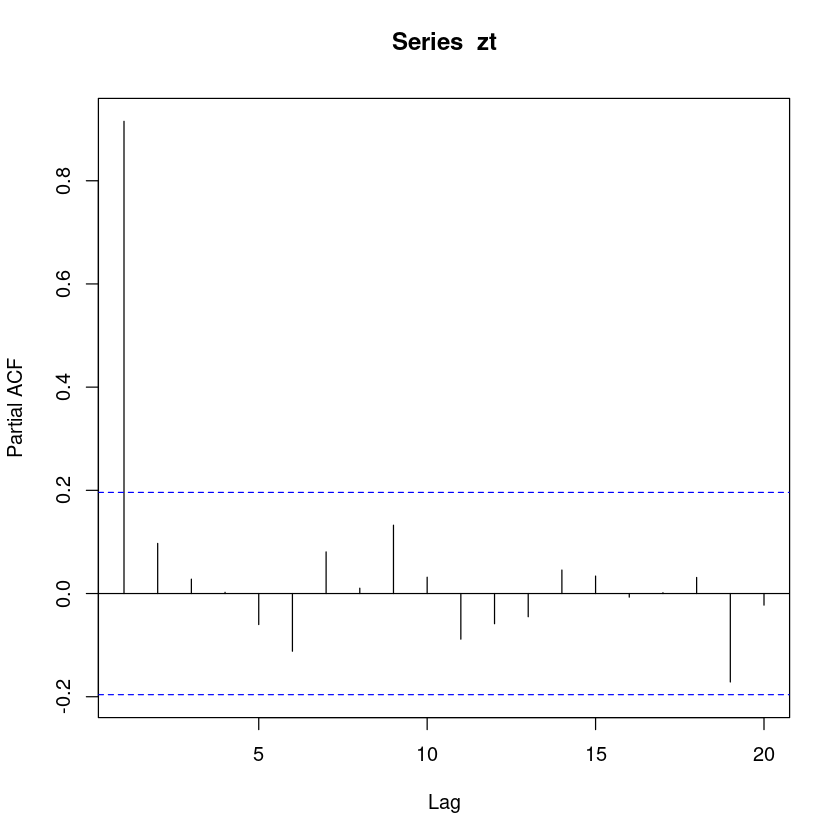

In [74]:
pacf(zt)$acf # 정상인 AR(1)

### (d) - (e)

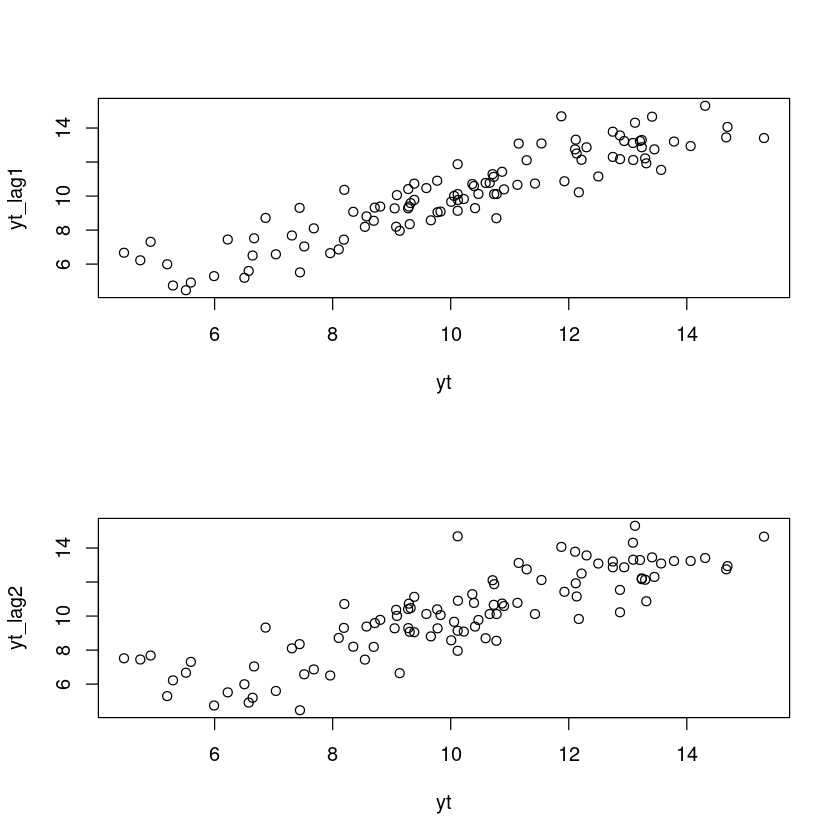

In [43]:
par(mfrow=c(2,1))
yt<-c(zt,mean(zt),mean(zt)) # yt<-c(zt-mean(zt),0,0)
yt_lag1<-c(mean(zt),zt,mean(zt))
yt_lag2<-c(mean(zt),mean(zt),zt)
plot(yt,yt_lag1)
plot(yt,yt_lag2)

-   양의 상관관계를 보인다.
-   lag2는 lag1보다는 약한 상관관계를 보인다.

In [44]:
lm(yt~yt_lag1)$coefficients # 이론적인 true값은 0.9

(Intercept)     yt_lag1 
  0.8585824   0.9151428

In [45]:
lm(yt~yt_lag2)$coefficients # 이론적인 true값은 0.9

(Intercept)     yt_lag2 
  1.4846471   0.8532663

-   1307번째 평행세계, 2000번째 평행세계,... 계속 반복을 하다보면 값들의 평균이 결국 $0.9$ 로 수렴한다.
-   acf값이 큰수의 법칙에 따라 true acf값으로 수렴하게 될 것이다.